## Import Libraries

In [ ]:
#Import libraries 
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow import keras
import re
import seaborn as sb
import string


## Import the dataset

In [ ]:
#Read the dataset file

default = pd.read_csv('FinNewsCredibility.csv')  


In [ ]:
default.head(10)

,Date,Body,Fake
0,2019-01-02,"""It's a game really -- like poker,"" said Ms. D...",0.718983
1,2019-01-02,"""The market is vulnerable right now,"" said Ter...",0.245023
2,2019-01-02,Defense companies including Lockheed Martin Co...,0.889442
3,2019-01-02,"In cases the department rejected, a U.S. metal...",0.523263
4,2019-01-02,"For now, analysts still expect profits to keep...",0.859711
5,2019-01-02,For every sell order from Fidelity's retail br...,0.915604
6,2019-01-02,"Meanwhile, firms such as investment giant Blac...",0.884017
7,2019-01-02,Revamping the state's incentive program hasn't...,0.940286
8,2019-01-02,Two-thirds of projections made by the fracking...,0.351372
9,2019-01-02,A former head of strategy lasted even less tim...,0.336440


In [ ]:
# Inspect the missing values

default.isnull().sum()

Date    0
Body    0
Fake    0
dtype: int64

In [ ]:
print("The data has mean =", default["Fake"].mean())
print("The data has range =", default["Fake"].max() - default["Fake"].min())
print("The data has skewness =", default["Fake"].skew())

The data has mean = 0.3476136110822844
The data has range = 0.9656880954280497
The data has skewness = 0.8602434050420217


## Data Preprocessing



In [ ]:
#Drop the irrelevant column

df = default.drop("Date", axis = 1)

In [ ]:
df.head(10)

,Body,Fake
0,"""It's a game really -- like poker,"" said Ms. D...",0.718983
1,"""The market is vulnerable right now,"" said Ter...",0.245023
2,Defense companies including Lockheed Martin Co...,0.889442
3,"In cases the department rejected, a U.S. metal...",0.523263
4,"For now, analysts still expect profits to keep...",0.859711
5,For every sell order from Fidelity's retail br...,0.915604
6,"Meanwhile, firms such as investment giant Blac...",0.884017
7,Revamping the state's incentive program hasn't...,0.940286
8,Two-thirds of projections made by the fracking...,0.351372
9,A former head of strategy lasted even less tim...,0.336440


In [ ]:
# Add colume "Class" for Classifiying "Fake" and "Real" News
# 1 -> Fake; 0 -> Real

def Fake_categorization(value):
    if value >= 0.5:
      return 1
    else:
      return 0

df["Class"] = df["Fake"].map(Fake_categorization)

# Drop the "Fake" column
df = df.drop("Fake", axis = 1)

df

,Body,Class
0,"""It's a game really -- like poker,"" said Ms. D...",1
1,"""The market is vulnerable right now,"" said Ter...",0
2,Defense companies including Lockheed Martin Co...,1
3,"In cases the department rejected, a U.S. metal...",1
4,"For now, analysts still expect profits to keep...",1
...,...,...
106165,"For Jumei's ADS holders, the change in the ADS...",0
106166,"TROY, Mich., Dec. 31, 2019 TROY, Mich., Dec. ...",0
106167,"ENGLEWOOD, Colo.--(BUSINESS WIRE)--December 3...",0
106168,"BLUEFIELD, Va., Dec. 31, 2019 (GLOBE NEWSWIRE)...",0


In [ ]:
# Remove unnecessary character such as *,#,@...etc
def wordrop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
df["Body"] = df["Body"].apply(wordrop)

In [ ]:
df

,Body,Class
0,it s a game really like poker said ms d...,1
1,the market is vulnerable right now said ter...,0
2,defense companies including lockheed martin co...,1
3,in cases the department rejected a u s metal...,1
4,for now analysts still expect profits to keep...,1
...,...,...
106165,for jumei s ads holders the change in the ads...,0
106166,troy mich dec troy mich dec pr...,0
106167,englewood colo business wire december ...,0
106168,bluefield va dec globe newswire fi...,0


## Class balance

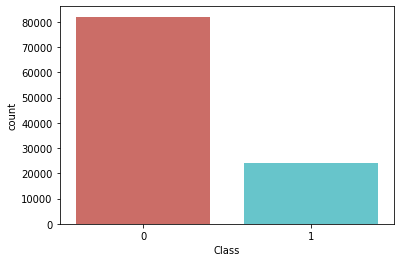

In [ ]:
#Visualing the distribution of the "Class"
def create_distribution(dataFile):
    return sb.countplot(x='Class', data=dataFile, palette='hls')

create_distribution(df)

In [ ]:
df["Class"].value_counts()

0    82194
1    23976
Name: Class, dtype: int64

## Prepare the Training and Testing Data 

In [ ]:
# Split the data into train and validation sets
# Size of Train data: Size of Test data = 7:3
y = df['Class']                                                                           
X = df['Body']                                                                          

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  

In [ ]:
y_train

21675     0
105155    0
78373     0
68978     0
44282     1
         ..
34166     1
75892     0
104348    0
71746     0
36005     1
Name: Class, Length: 74319, dtype: int64

In [ ]:
# initialize sentences and labels lists
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []


for i in X_train.values:
  training_sentences.append(i)
for i in y_train.values:
  training_labels.append(i)
for i in X_test.values:
  testing_sentences.append(i)
for i in y_test.values:
  testing_labels.append(i)
  
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

print(f"There are {len(training_sentences)} sentences for training.\n")
print(f"There are {len(training_labels)} labels for training.\n")
print(f"There are {len(testing_sentences)} sentences for validation.\n")
print(f"There are {len(testing_labels)} labels for validation.")

There are 74319 sentences for training.

There are 74319 labels for training.

There are 31851 sentences for validation.

There are 31851 labels for validation.


In [ ]:
# Set parameters
vocab_size = 10000
trunc_type='post'
oov_tok = "<OOV>"

# initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# generate the word index dictionary from training_sentences
# gnerate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 194362 words

<OOV> token included in vocabulary


In [ ]:
max_length = 16

# generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type)

# generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

print(f"Padded and truncated training sequences have shape: {training_padded.shape}\n")
print(f"Padded and truncated Testing sequences have shape: {testing_padded.shape}")

Padded and truncated training sequences have shape: (74319, 16)

Padded and truncated Testing sequences have shape: (31851, 16)


## 1st Model - LSTM Model 

In [ ]:
# hyperparameters
embedding_dim = 100
state_dim = 64
dense_dim = 32
max_length = 16

# model definition
model = Sequential([layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                layers.LSTM(100),
                                layers.Dense(dense_dim, activation='relu'),
                                layers.Dense(1, activation='sigmoid')], name="LSTM_Model")

# set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print the model summary
model.summary()

history = model.fit(training_padded, training_labels, batch_size=512, epochs=20, validation_data=(testing_padded, testing_labels))

Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_34 (Embedding)    (None, 16, 100)           1000000   
                                                                 
 lstm_54 (LSTM)              (None, 100)               80400     
                                                                 
 dense_68 (Dense)            (None, 32)                3232      
                                                                 
 dense_69 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,083,665
Trainable params: 1,083,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
146/146 [==============================] - 3s 12ms/step - loss: 0.3414 - accuracy: 0.8625 - val_loss: 0.2949 - val_accuracy: 0.8763
Epoch 2/20
146/146 [===============

In [ ]:
#Model evaluation
model.evaluate(training_padded, training_labels, batch_size=512)

146/146 [==============================] - 1s 4ms/step - loss: 0.1159 - accuracy: 0.9448


[0.11589742451906204, 0.9447920322418213]

In [ ]:
model.evaluate(testing_padded, testing_labels, batch_size=512)

63/63 [==============================] - 0s 4ms/step - loss: 0.8276 - accuracy: 0.8599


[0.827599287033081, 0.8599101901054382]

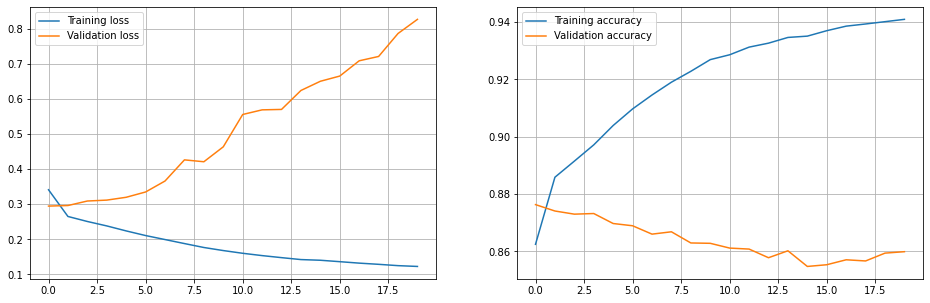

In [ ]:
# plot the accuracy and loss history
metric_df = pd.DataFrame(history.history)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
for metric, ax in zip(["loss", "accuracy"], axs):
  ax.plot(metric_df[metric], label=f'Training {metric}')
  ax.plot(metric_df['val_' + metric], label=f'Validation {metric}')
  ax.grid(True)
  ax.legend()

##2nd Model - Bidirectional LSTM Model

**Train the Model**

In [ ]:
# hyperparameters
embedding_dim = 100
state_dim = 64
dense_dim = 32
max_length = 16

# model definition
model = Sequential([layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                layers.Bidirectional(layers.LSTM(state_dim, return_sequences=True)),
                                layers.Bidirectional(layers.LSTM(state_dim, return_sequences=True)),
                                layers.Bidirectional(layers.LSTM(state_dim)),
                                layers.Dense(dense_dim, activation='relu'),
                                layers.Dense(1, activation='sigmoid')], name="Bidirectional_LSTM")

# set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print the model summary
model.summary()

history = model.fit(training_padded, training_labels, batch_size=512, epochs=20, validation_data=(testing_padded, testing_labels))

Model: "Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_35 (Embedding)    (None, 16, 100)           1000000   
                                                                 
 bidirectional_51 (Bidirecti  (None, 16, 128)          84480     
 onal)                                                           
                                                                 
 bidirectional_52 (Bidirecti  (None, 16, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_53 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dense_70 (Dense)            (None, 32)                4128      
                                                

**Evaluation**

In [ ]:
#Model evaluation
model.evaluate(training_padded, training_labels, batch_size=512)

146/146 [==============================] - 1s 9ms/step - loss: 0.1165 - accuracy: 0.9452


[0.11653302609920502, 0.9452226161956787]

In [ ]:
model.evaluate(testing_padded, testing_labels, batch_size=512)

63/63 [==============================] - 1s 9ms/step - loss: 0.7062 - accuracy: 0.8579


[0.7062010169029236, 0.8579322695732117]

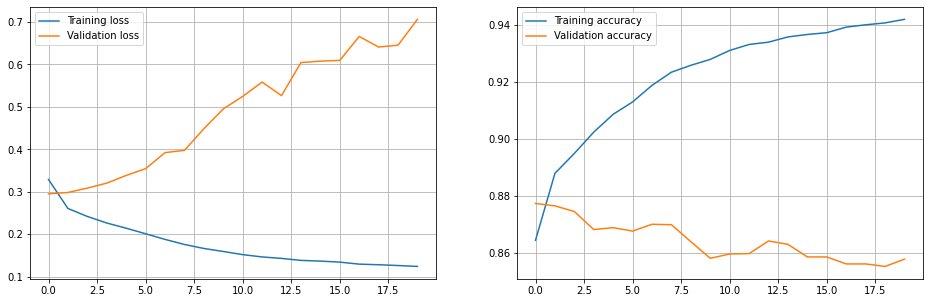

In [ ]:
# plot the accuracy and loss history
metric_df = pd.DataFrame(history.history)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
for metric, ax in zip(["loss", "accuracy"], axs):
  ax.plot(metric_df[metric], label=f'Training {metric}')
  ax.plot(metric_df['val_' + metric], label=f'Validation {metric}')
  ax.grid(True)
  ax.legend()

##Logistic Regression (Tradition Machine Learning Model)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into train and validation sets
# Size of Train data: Size of Test data = 7:3
y = df['Class']                                                                           
X = df['Body']                                                                          

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  

In [ ]:
#Convert text to vectors
vectorization = TfidfVectorizer()
X_train_2 = vectorization.fit_transform(X_train)
X_test_2 = vectorization.transform(X_test)


In [ ]:
print("The training sets have shape:", X_train_2.shape)
print("The testing sets have shape:", X_test_2.shape)

The training sets have shape: (74319, 194891)
The testing sets have shape: (31851, 194891)


In [ ]:
print(X_train_2)

  (0, 69279)	0.006362653749227441
  (0, 56237)	0.006376517778388803
  (0, 121830)	0.016393535627305864
  (0, 119310)	0.0062389010744685405
  (0, 89414)	0.006073466108938934
  (0, 48506)	0.00608127644157135
  (0, 53863)	0.006708727814962137
  (0, 34543)	0.006046829211223242
  (0, 191104)	0.013191162738460509
  (0, 70660)	0.0510897795618055
  (0, 131472)	0.04687906953838153
  (0, 191029)	0.015524703350210911
  (0, 46320)	0.014953089023222274
  (0, 104617)	0.019151978620714633
  (0, 19548)	0.06021032884397471
  (0, 164959)	0.025613452170126123
  (0, 137495)	0.012686678020256904
  (0, 57019)	0.02898423284013925
  (0, 141651)	0.022650818203913774
  (0, 154590)	0.02468075527800278
  (0, 187795)	0.008124123031919702
  (0, 25281)	0.04341574160202512
  (0, 72757)	0.04799301464307945
  (0, 134943)	0.034048846065860665
  (0, 6221)	0.03475907120056133
  :	:
  (74221, 86796)	0.0170924056686148
  (74221, 172495)	0.02489450752608188
  (74221, 188342)	0.01507096108846494
  (74221, 86400)	0.06412676602

**Train the Model**

In [ ]:
LR = LogisticRegression()
LR.fit(X_train_2,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
training_pred= LR.predict(X_train_2)
training_acc = accuracy_score(training_pred,y_train)
print("Accuracy score of training sets =",training_acc)

Accuracy score of training sets 0.9255072619977904


In [ ]:
testing_pred= LR.predict(X_test_2)
testing_acc = accuracy_score(testing_pred,y_test)
print("Accuracy score of testing sets =",testing_acc)

Accuracy score of testing sets 0.9155611442942471


## Improvement I (Alleviating overfitting): Building Model With Pre-Trained embeddings 

In [ ]:
# download and extract the word vector file
! wget "https://nlp.stanford.edu/data/glove.6B.zip"
! unzip -j glove.6B.zip "glove.6B.100d.txt" -d glove

--2022-12-22 11:54:41--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-22 11:54:42--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2022-12-22 11:57:21 (5.18 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove/glove.6B.100d.txt  


In [ ]:
!ls -lh glove

total 332M
-rw-rw-r-- 1 root root 332M Aug  4  2014 glove.6B.100d.txt


In [ ]:
# show the first 10 words (one word per line) in this .txt file
! cat glove/glove.6B.100d.txt | head 

the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062
, -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10663 0.038867 0.35481 0.06351 -0.094189 0.15786 -0.81665 0.14172 0.21939 0.58505 -0.52158 

In [ ]:
embeddings_index = {}
f = open("glove/glove.6B.100d.txt")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print(f'Found {len(embeddings_index)} word vectors.')
print(f"number of dimensions: {embeddings_index['hi'].shape}")

Found 400000 word vectors.
number of dimensions: (100,)


In [ ]:
# recall vocab_size = 10000 and embedding_dim = 100

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for i in range(1, vocab_size):
    embedding_vector = embeddings_index.get(tokenizer.index_word[i])
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
print(embedding_matrix.shape)

(10000, 100)


In [ ]:
# index 0 is reserved for padding
# index 1 represents <OOV>

print(f"the word associated with index 2 in the dictionary is '{tokenizer.index_word[2]}'")
embedding_matrix[2, :]  == embeddings_index['the']

the word associated with index 2 in the dictionary is 'the'


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
print(f"the word associated with index 5 in the dictionary is '{tokenizer.index_word[5]}'")
embedding_matrix[5, :]  == embeddings_index['of']

the word associated with index 5 in the dictionary is 'to'


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

Performance of 1st model (LSTM) after first improvement

In [ ]:
# hyperparameters
embedding_dim = 100
state_dim = 64
dense_dim = 32
max_length = 16

# model definition
model = Sequential([layers.Embedding(vocab_size, embedding_dim, input_length=max_length, 
                                                 embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), 
                                                 trainable=False),
                                layers.LSTM(100),
                                layers.Dense(dense_dim, activation='relu'),
                                layers.Dense(1, activation='sigmoid')], name="LSTM_Model")

# set the training parameters
optimizer_algo = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print the model summary
model.summary()

history = model.fit(training_padded, training_labels, batch_size=512, epochs=20, validation_data=(testing_padded, testing_labels))

Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, 16, 100)           1000000   
                                                                 
 lstm_58 (LSTM)              (None, 100)               80400     
                                                                 
 dense_72 (Dense)            (None, 32)                3232      
                                                                 
 dense_73 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,083,665
Trainable params: 83,665
Non-trainable params: 1,000,000
_________________________________________________________________
Epoch 1/20
146/146 [==============================] - 3s 10ms/step - loss: 0.3506 - accuracy: 0.8604 - val_loss: 0.3107 - val_accuracy: 0.8720
Epoch 2/20
146/146 [==========

In [ ]:
#Model evaluation
model.evaluate(training_padded, training_labels, batch_size=1024)

73/73 [==============================] - 0s 5ms/step - loss: 0.1965 - accuracy: 0.9156


[0.19650733470916748, 0.9155532121658325]

In [ ]:
#Model evaluation
model.evaluate(testing_padded, testing_labels, batch_size=1024)

32/32 [==============================] - 0s 5ms/step - loss: 0.3238 - accuracy: 0.8735


[0.3238290250301361, 0.8734733462333679]

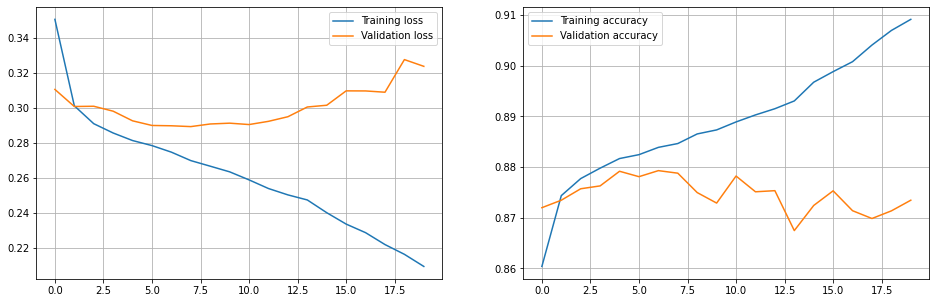

In [ ]:
# plot the accuracy and loss history
metric_df = pd.DataFrame(history.history)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
for metric, ax in zip(["loss", "accuracy"], axs):
  ax.plot(metric_df[metric], label=f'Training {metric}')
  ax.plot(metric_df['val_' + metric], label=f'Validation {metric}')
  ax.grid(True)
  ax.legend()

**Performance of 2nd model (Bidirectional LSTM) after improvement**

In [ ]:
# hyperparameters
embedding_dim = 100
state_dim = 64
dense_dim = 32
max_length = 16

# model definition
model = Sequential([layers.Embedding(vocab_size, embedding_dim, input_length=max_length, 
                                                 embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), 
                                                 trainable=False),
                                layers.Bidirectional(layers.LSTM(state_dim, return_sequences=True)),
                                layers.Bidirectional(layers.LSTM(state_dim, return_sequences=True)),
                                layers.Bidirectional(layers.LSTM(state_dim)),
                                layers.Dense(dense_dim, activation='relu'),
                                layers.Dense(1, activation='sigmoid')], name="multi_layer")

# set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print the model summary
model.summary()

history = model.fit(training_padded, training_labels, batch_size=512, epochs=20, validation_data=(testing_padded, testing_labels))

Model: "multi_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_37 (Embedding)    (None, 16, 100)           1000000   
                                                                 
 bidirectional_54 (Bidirecti  (None, 16, 128)          84480     
 onal)                                                           
                                                                 
 bidirectional_55 (Bidirecti  (None, 16, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_56 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dense_74 (Dense)            (None, 32)                4128      
                                                       

In [ ]:
#Model evaluation
model.evaluate(training_padded, training_labels, batch_size=1024)

73/73 [==============================] - 1s 10ms/step - loss: 0.1840 - accuracy: 0.9206


[0.18402162194252014, 0.9206393957138062]

In [ ]:
#Model evaluation
model.evaluate(testing_padded, testing_labels, batch_size=1024)

32/32 [==============================] - 0s 12ms/step - loss: 0.3640 - accuracy: 0.8698


[0.3640194237232208, 0.869831383228302]

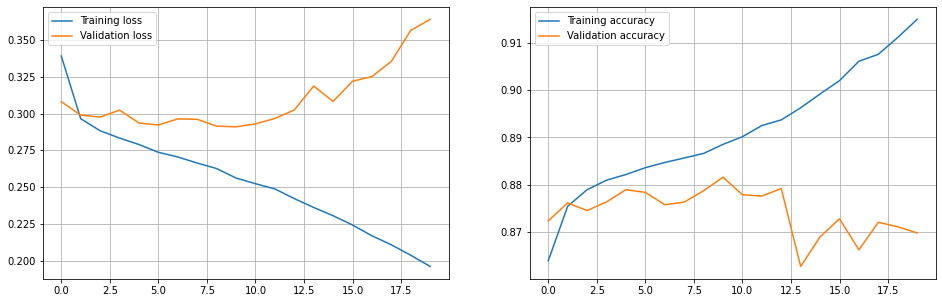

In [ ]:
# plot the accuracy and loss history
metric_df = pd.DataFrame(history.history)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
for metric, ax in zip(["loss", "accuracy"], axs):
  ax.plot(metric_df[metric], label=f'Training {metric}')
  ax.plot(metric_df['val_' + metric], label=f'Validation {metric}')
  ax.grid(True)
  ax.legend()

## Improvement II (Alleviating overfitting): Apply Drop out rate

**Performance of 1st model (LSTM) after second improvement**

In [ ]:
# hyperparameters
embedding_dim = 100
state_dim = 64
dense_dim = 32
max_length = 16

# model definition
model = Sequential([layers.Embedding(vocab_size, embedding_dim, input_length=max_length, 
                                                 embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), 
                                                 trainable=False),
                                layers.Dropout(rate = 0.4),
                                layers.LSTM(100),
                                layers.Dropout(rate = 0.4),
                                layers.Dense(dense_dim, activation='relu'),
                                layers.Dense(1, activation='sigmoid')], name="LSTM_Model")

# set the training parameters
optimizer_algo = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print the model summary
model.summary()

history = model.fit(training_padded, training_labels, batch_size=512, epochs=20, validation_data=(testing_padded, testing_labels))

Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_38 (Embedding)    (None, 16, 100)           1000000   
                                                                 
 dropout_29 (Dropout)        (None, 16, 100)           0         
                                                                 
 lstm_62 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_30 (Dropout)        (None, 100)               0         
                                                                 
 dense_76 (Dense)            (None, 32)                3232      
                                                                 
 dense_77 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,083,665
Trainable params: 83,665
Non-tra

In [ ]:
#Model evaluation
model.evaluate(training_padded, training_labels, batch_size=512)

146/146 [==============================] - 1s 4ms/step - loss: 0.2615 - accuracy: 0.8858


[0.26146093010902405, 0.885776162147522]

In [ ]:
model.evaluate(testing_padded, testing_labels, batch_size=512)

63/63 [==============================] - 0s 4ms/step - loss: 0.2889 - accuracy: 0.8801


[0.2888895571231842, 0.880129337310791]

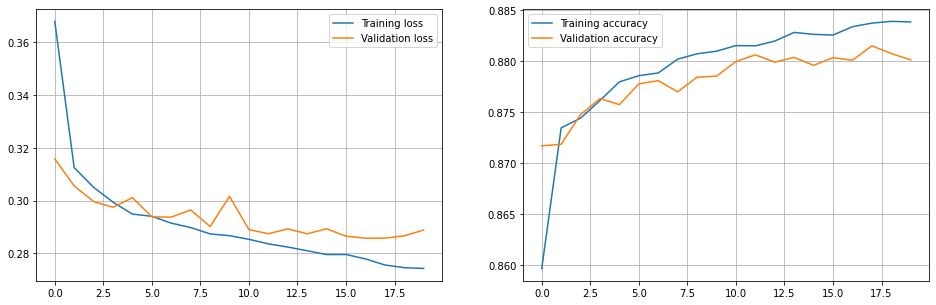

In [ ]:
# plot the accuracy and loss history
metric_df = pd.DataFrame(history.history)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
for metric, ax in zip(["loss", "accuracy"], axs):
  ax.plot(metric_df[metric], label=f'Training {metric}')
  ax.plot(metric_df['val_' + metric], label=f'Validation {metric}')
  ax.grid(True)
  ax.legend()

**Performance of 2nd model (Bidirectional LSTM) after second improvement**

In [ ]:
# hyperparameters
embedding_dim = 100
state_dim = 64
dense_dim = 32
max_length = 16

# model definition
model = Sequential([layers.Embedding(vocab_size, embedding_dim, input_length=max_length, 
                                                 embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), 
                                                 trainable=False),
                                layers.Bidirectional(layers.LSTM(state_dim, return_sequences=True, dropout=0.4)),
                                layers.Dropout(rate=0.3),
                                layers.Bidirectional(layers.LSTM(state_dim, return_sequences=True, dropout=0.4)),
                                layers.Bidirectional(layers.LSTM(state_dim)),
                                layers.Dense(dense_dim, activation='relu'),
                                layers.Dense(1, activation='sigmoid')], name="multi_layer")

# set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print the model summary
model.summary()

history = model.fit(training_padded, training_labels, batch_size=512, epochs=20, validation_data=(testing_padded, testing_labels))

Model: "multi_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_39 (Embedding)    (None, 16, 100)           1000000   
                                                                 
 bidirectional_57 (Bidirecti  (None, 16, 128)          84480     
 onal)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 16, 128)           0         
                                                                 
 bidirectional_58 (Bidirecti  (None, 16, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_59 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                       

In [ ]:
#Model evaluation
model.evaluate(training_padded, training_labels, batch_size=512)

146/146 [==============================] - 1s 10ms/step - loss: 0.2546 - accuracy: 0.8909


[0.2545579671859741, 0.8908892869949341]

In [ ]:
model.evaluate(testing_padded, testing_labels, batch_size=512)

63/63 [==============================] - 1s 9ms/step - loss: 0.2876 - accuracy: 0.8806


[0.28756043314933777, 0.8806002736091614]

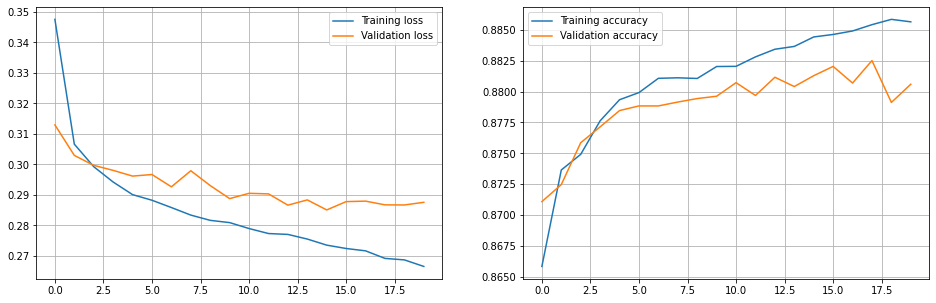

In [ ]:
# plot the accuracy and loss history
metric_df = pd.DataFrame(history.history)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
for metric, ax in zip(["loss", "accuracy"], axs):
  ax.plot(metric_df[metric], label=f'Training {metric}')
  ax.plot(metric_df['val_' + metric], label=f'Validation {metric}')
  ax.grid(True)
  ax.legend()